In this project, I use raw infrared image data from the James Webb Space Telescope and perform basic image processing techniques to create a false color image of NGC3132, or the Southern Ring Nebula. 
Raw JWST data may be freely obtained via the Barbara A. Mikulski Archive for Space Telescopes, or MAST archive located at https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html .

In [146]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
from PIL import Image
from skimage import exposure
%matplotlib inline

The raw data is in the FITS file format. The ```fits.open``` method from astropy is needed to open it.  

There are five files corresponding to five images taken with the Near Infrared Camera (NIRCAM) with different filters to select several infrared bandwidths. More information explaining the NIRCAM filters can be found at https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-instrumentation/nircam-filters .

In [147]:
# Open the FITS files
dataf090w = fits.open('jw02733-o001_t001_nircam_clear-f090w_i2d.fits') # f090w short wavelength data
dataf187n = fits.open('jw02733-o001_t001_nircam_clear-f187n_i2d.fits') # f187n short wavelength data
dataf356w = fits.open('jw02733-o001_t001_nircam_clear-f356w_i2d.fits') # f356w medium wavelength data
dataf444w = fits.open('jw02733-o001_t001_nircam_f405n-f444w_i2d.fits') # f444w long wavelength data
dataf470n = fits.open('jw02733-o001_t001_nircam_f444w-f470n_i2d.fits') # f470 long wavelength data

In [148]:
# Retrieve image data from index of FITS files
f090w = dataf090w[1].data
f187n = dataf187n[1].data
f356w = dataf356w[1].data
f444w = dataf444w[1].data
f470n = dataf470n[1].data

In [149]:
# check image dimensions
print(f'f090w: {f090w.shape}\nf187n: {f187n.shape}\nf356w: {f356w.shape}\nf444w: {f444w.shape}\nf470n: {f470n.shape}')

f090w: (4886, 4896)
f187n: (4805, 4826)
f356w: (2348, 2356)
f444w: (2348, 2356)
f470n: (2348, 2356)


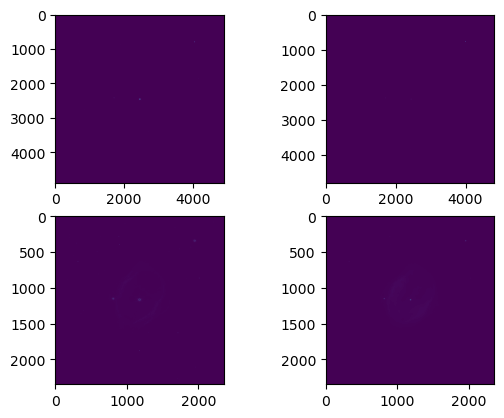

In [150]:
# preview images
f, axarr = plt.subplots(2,2);
axarr[0,0].imshow(f090w);
axarr[0,1].imshow(f187n);
axarr[1,0].imshow(f356w);
axarr[1,1].imshow(f444w);

Because the images are taken in infrared, there is barely any detail visible. To  process and stack the images, they need to be the same size.

In [151]:
# define a function to resize image data and save as array
def resize(image):
    image_resized = Image.fromarray(image)
    image_resized = image_resized.resize((2348, 2356))
    image_resized = np.asarray(image_resized)
    return image_resized.transpose()    

In [152]:
# pass image data into resizing function
f090w = resize(f090w)
f187n = resize(f187n)
f356w = resize(f356w)
f444w = resize(f444w)
f470n = resize(f470n)

In [153]:
# check image dimensions
print(f'f090w: {f090w.shape}\nf187n: {f187n.shape}\nf356w: {f356w.shape}\nf444w: {f444w.shape}\nf470n: {f470n.shape}')

f090w: (2348, 2356)
f187n: (2348, 2356)
f356w: (2348, 2356)
f444w: (2348, 2356)
f470n: (2348, 2356)


Now the images are all the same size. Because digital images are displayed with pixel values ranging from 0-255, any values outside of this range are clipped. In order to prevent image data loss, the range of the raw data must be normalized to within 0-255.

In [154]:
# check the ranges of pixel values
print(f'f090w: {np.ptp(f090w)}\nf187n: {np.ptp(f187n)}\nf356w: {np.ptp(f356w)}\
\nf444w: {np.ptp(f444w)}\nf470n: {np.ptp(f470n)}')

f090w: 4178.10107421875
f187n: 12829.041015625
f356w: 404.74713134765625
f444w: 1953.717041015625
f470n: 7646.43701171875


In [155]:
# define image normalizing function
def norm(image): 
    image_norm = ((image - image.min())/(image.max() - image.min()))*255
    return image_norm

In [156]:
# pass image data into normalization function
f090w = norm(f090w)
f187n = norm(f187n)
f356w = norm(f356w)
f444w = norm(f444w)
f470n = norm(f470n)

In [157]:
# check the ranges of pixel values
print(f'f090w: {np.ptp(f090w)}\nf187n: {np.ptp(f187n)}\nf356w: {np.ptp(f356w)}\
\nf444w: {np.ptp(f444w)}\nf470n: {np.ptp(f470n)}')

f090w: 255.0
f187n: 255.0
f356w: 255.0
f444w: 255.0
f470n: 255.0


Now the pixels are within the correct range. In astronomical images, the pixel values tend to be highly clustered around values of peak brightness with lots of dark pixels throughout the rest of the image. This causes a loss of image detail. To check this, I created histograms of each image.

In [158]:
# flatten arrays for histogram
# f090w = f090w.flatten()
# f187n = f187n.flatten()
# f356w = f356w.flatten()
# f444w = f444w.flatten()

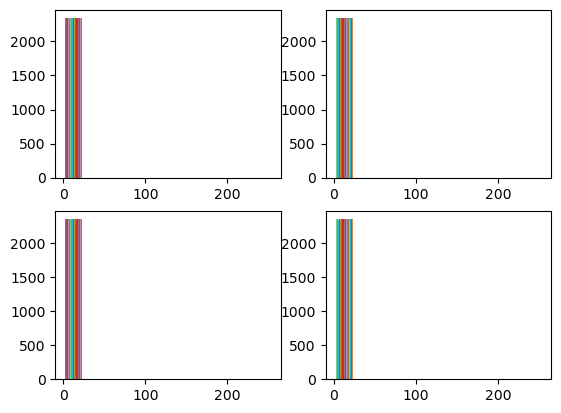

In [159]:
# view histograms
f, axarr = plt.subplots(2,2);
axarr[0,0].hist(f090w);
axarr[0,1].hist(f187n);
axarr[1,0].hist(f356w);
axarr[1,1].hist(f444w);

These histograms are not well spread out. To fix this, I applied a histogram equalization to each image.

In [220]:
# apply histogram equalization
for i in range(25):
    f090w = exposure.equalize_hist(f090w)
    f187n = exposure.equalize_hist(f187n)
    f356w = exposure.equalize_hist(f356w)
    f444w = exposure.equalize_hist(f444w)

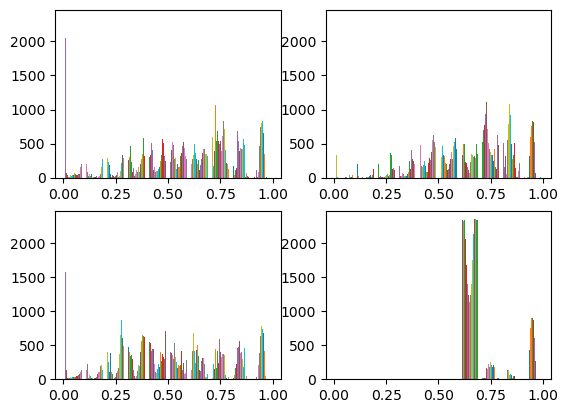

In [162]:
# view histograms
f, axarr = plt.subplots(2,2);
axarr[0,0].hist(f090w);
axarr[0,1].hist(f187n);
axarr[1,0].hist(f356w);
axarr[1,1].hist(f444w);

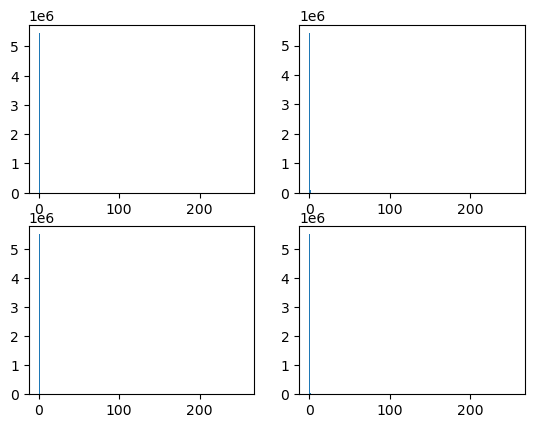

In [221]:
f, axarr = plt.subplots(2,2);
axarr[0,0].hist(f090w.ravel(), bins=range(256));
axarr[0,1].hist(f187n.ravel(), bins=range(256));
axarr[1,0].hist(f356w.ravel(), bins=range(256));
axarr[1,1].hist(f444w.ravel(), bins=range(256));

In [226]:
# create image color channels
R = f356w + f444w
R = norm(R)
G = f187n
B = f090w

In [227]:
R = R.astype(np.uint8)
G = G.astype(np.uint8)
B = B.astype(np.uint8)

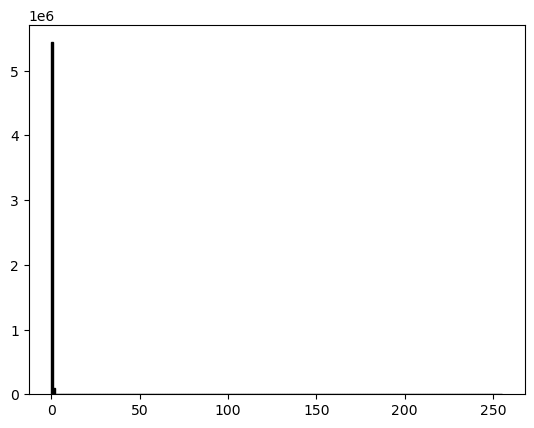

In [207]:
plt.hist(G.ravel(), bins=range(256), fc='k', ec='k');

In [228]:
composite = np.dstack((R,G,B))

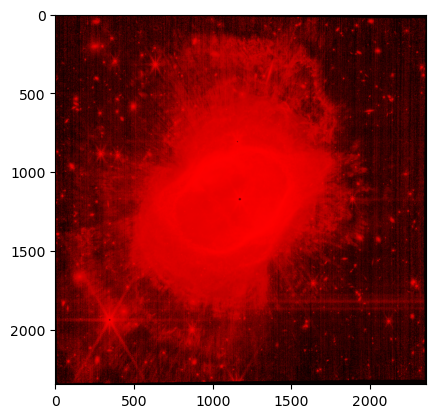

In [229]:
plt.imshow(composite)

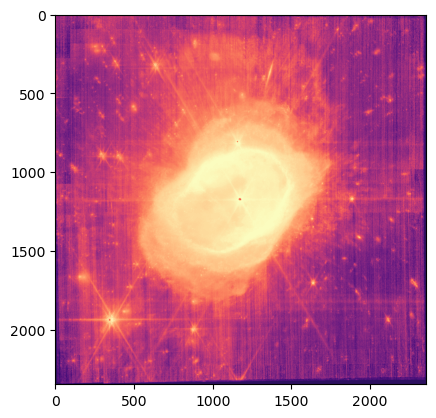

In [165]:
# Stack images
stack = f090w + f187n + f356w + f444w
stack = norm(stack)
plt.figure()
plt.imshow(stack, cmap='magma')


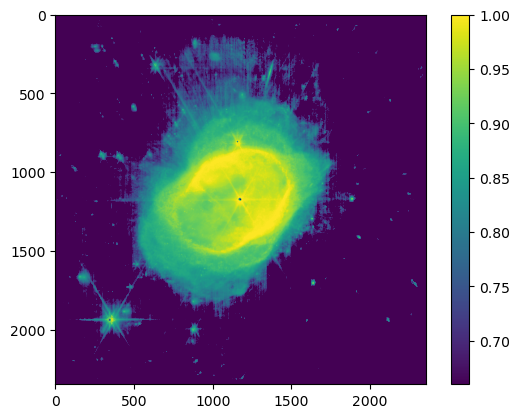

In [208]:
stack_eq = exposure.equalize_hist(stack)
plt.figure()
plt.imshow(stack_eq, vmin=0.66, vmax=1)
plt.colorbar()

In [ ]:
# stackflat = stack_eq.flatten()
# plt.figure()
# plt.hist(stackflat, bins='auto')